In [ ]:
from __future__ import absolute_import, division, print_function
import numpy as np 
import pandas as pd 
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import keras
from tensorflow.keras.layers import Dense, Reshape, Flatten, LeakyReLU, BatchNormalization, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive/My Drive/Parasitized_5000'

C33P1thinF_IMG_20150619_114756a_cell_179.png
C33P1thinF_IMG_20150619_114756a_cell_180.png
C33P1thinF_IMG_20150619_114756a_cell_181.png
C33P1thinF_IMG_20150619_114756a_cell_182.png
C33P1thinF_IMG_20150619_115740a_cell_161.png
C33P1thinF_IMG_20150619_115740a_cell_162.png
C33P1thinF_IMG_20150619_115740a_cell_163.png
C33P1thinF_IMG_20150619_115808a_cell_205.png
C33P1thinF_IMG_20150619_115808a_cell_206.png
C33P1thinF_IMG_20150619_120645a_cell_215.png
C33P1thinF_IMG_20150619_120645a_cell_216.png
C33P1thinF_IMG_20150619_120645a_cell_217.png
C33P1thinF_IMG_20150619_120742a_cell_210.png
C33P1thinF_IMG_20150619_120804a_cell_224.png
C33P1thinF_IMG_20150619_120838a_cell_222.png
C33P1thinF_IMG_20150619_121102a_cell_193.png
C33P1thinF_IMG_20150619_121229a_cell_177.png
C33P1thinF_IMG_20150619_121229a_cell_178.png
C33P1thinF_IMG_20150619_121229a_cell_179.png
C33P1thinF_IMG_20150619_121300a_cell_156.png
C33P1thinF_IMG_20150619_121411a_cell_189.png
C33P1thinF_IMG_20150619_121411a_cell_190.png
C33P1thinF

In [ ]:
codings_size=100

In [ ]:
count=0
data=[]

for i in os.listdir('/content/gdrive/My Drive/Parasitized_5000'):
  try:
    count=count+1
    if count%1000==0:
      print(f"{count} Images read")
    image = cv2.imread("/content/gdrive/My Drive/Parasitized_5000/"+i)
    image_array = Image.fromarray(image , 'RGB')
    resize_img = image_array.resize((48 , 48))
    data.append(resize_img)
  except AttributeError:
    print('')

1000 Images read
2000 Images read
3000 Images read
4000 Images read
5000 Images read


Converting Image to array

In [ ]:
train_data=[]
for i in range(5050):
  train_data.append(np.asarray(data[i]))

GAN Model- Generator and Discriminator

In [ ]:
generator=Sequential()
generator.add(Dense(12*12*128, input_shape=[codings_size]))
generator.add(Reshape([12,12,128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(32,kernel_size=5,strides=2, padding="same",activation="relu"))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(3,kernel_size=5,strides=2, padding="same",activation="tanh"))
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18432)             1861632   
_________________________________________________________________
reshape (Reshape)            (None, 12, 12, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 128)       512       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 24, 24, 32)        102432    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 48, 48, 3)         2403      
Total params: 1,967,107
Trainable params: 1,966,787
Non-trainable params: 320
____________________________________________

In [ ]:
discriminator=Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding="same",activation=LeakyReLU(0.1),input_shape=[48,48,3]))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same",activation=LeakyReLU(0.1)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(256, kernel_size=5, strides=2, padding="same",activation=LeakyReLU(0.1)))
discriminator.add(Dropout(0.35))
discriminator.add(Flatten())
discriminator.add(Dense(1,activation="sigmoid"))
discriminator.summary()
discriminator.compile(loss='binary_crossentropy',optimizer='adam')

# input_layer=Input(shape=(48,48,3))
# discriminator_common_layers=Conv2D(64, kernel_size=5, strides=2, padding="same",activation=LeakyReLU(0.1))(input_layer)
# discriminator_common_layers=Dropout(0.2)(discriminator_common_layers)
# discriminator_common_layers=Conv2D(128, kernel_size=5, strides=2, padding="same",activation=LeakyReLU(0.1))(discriminator_common_layers)
# discriminator_common_layers=Dropout(0.25)(discriminator_common_layers)
# discriminator_common_layers=Conv2D(256, kernel_size=5, strides=2, padding="same",activation=LeakyReLU(0.1))(discriminator_common_layers)
# discriminator_common_layers=Dropout(0.3)(discriminator_common_layers)
# discriminator_common_layers=Flatten()(discriminator_common_layers)
# discriminator=Dense(1, activation="sigmoid")(discriminator_common_layers)
# discriminator=Model(inputs=input_layer, outputs=discriminator)
# discriminator.summary()
# discriminator.compile(loss='binary_crossentropy',optimizer='adam')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 24, 24, 64)        4864      
_________________________________________________________________
dropout_27 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 12, 12, 128)       204928    
_________________________________________________________________
dropout_28 (Dropout)         (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 6, 6, 256)         819456    
_________________________________________________________________
dropout_29 (Dropout)         (None, 6, 6, 256)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 9216)             

In [ ]:
X_train=np.asarray(train_data)
X_train=X_train/255
X_train=X_train.reshape(-1,48,48,3)*2. -1.

In [ ]:
X_train.min()

-1.0

In [ ]:
X_train.max()

1.0

In [ ]:
GAN=Sequential([generator,discriminator])
discriminator.trainable=False
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
batch_size=32
dataset=tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size=1000)

In [ ]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [ ]:
dataset=dataset.batch(batch_size=batch_size,drop_remainder=True).prefetch(1)

Training GAN

In [ ]:
epochs=1000

generator,discriminator=GAN.layers

for epoch in range(epochs):
  print(f"Currently in epoch {epoch+1}")
  i=0
  for X_batch in dataset:
    i=i+1
    if i%10==0:
      print(f"\t Currently on batch number {i} of {5050//batch_size}")
      ## Train DISCRIMINATOR
    noise=tf.random.normal(shape=[batch_size,codings_size])
    gen_images=generator(noise)
    X_fake_vs_real=tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)
    y1=tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
    discriminator.trainable=True
    discriminator.train_on_batch(X_fake_vs_real,y1)

    ## Train Generator
    noise=tf.random.normal(shape=[batch_size,codings_size])
    y2=tf.constant([[1.0]]*batch_size)
    discriminator.trainable=False
    GAN.train_on_batch(noise,y2)


Streaming output truncated to the last 5000 lines.
	 Currently on batch number 40 of 157
	 Currently on batch number 50 of 157
	 Currently on batch number 60 of 157
	 Currently on batch number 70 of 157
	 Currently on batch number 80 of 157
	 Currently on batch number 90 of 157
	 Currently on batch number 100 of 157
	 Currently on batch number 110 of 157
	 Currently on batch number 120 of 157
	 Currently on batch number 130 of 157
	 Currently on batch number 140 of 157
	 Currently on batch number 150 of 157
Currently in epoch 183
	 Currently on batch number 10 of 157
	 Currently on batch number 20 of 157
	 Currently on batch number 30 of 157
	 Currently on batch number 40 of 157
	 Currently on batch number 50 of 157
	 Currently on batch number 60 of 157
	 Currently on batch number 70 of 157
	 Currently on batch number 80 of 157
	 Currently on batch number 90 of 157
	 Currently on batch number 100 of 157
	 Currently on batch number 110 of 157
	 Currently on batch number 120 of 157
	 Cur

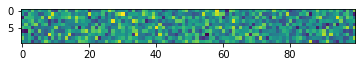

In [ ]:
noise=tf.random.normal(shape=[10,codings_size])
plt.imshow(noise)

In [ ]:
images=generator(noise)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


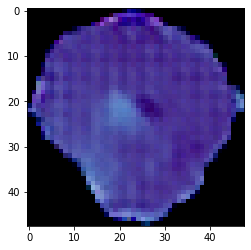

In [ ]:
plt.imshow(images[8])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


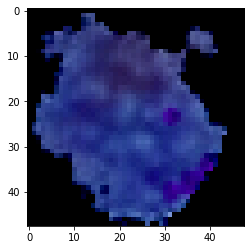

In [ ]:
noise=tf.random.normal(shape=[10,codings_size])
plt.imshow(noise)
images=generator(noise)
plt.imshow(images[9])

Transfer Learning-> train discriminator only on the uninfected images

In [ ]:
count=0
data=[]
label=[]
for i in os.listdir('/content/gdrive/My Drive/fine_tune'):
  try:
    print(i)
    count=count+1
    if count%100==0:
      print(f"{i} Images read")
    image = cv2.imread("/content/gdrive/My Drive/fine_tune/"+i)
    image_array = Image.fromarray(image , 'RGB')
    resize_img = image_array.resize((48 , 48))
    data.append(resize_img)
    label.append(1)
  except AttributeError:
    print('')



C12NThinF_IMG_20150614_125741_cell_175.png
C12NThinF_IMG_20150614_125741_cell_157.png
C12NThinF_IMG_20150614_125741_cell_172.png
C12NThinF_IMG_20150614_125741_cell_155.png
C12NThinF_IMG_20150614_125703_cell_52.png
C12NThinF_IMG_20150614_125703_cell_48.png
C12NThinF_IMG_20150614_125741_cell_101.png
C12NThinF_IMG_20150614_125741_cell_123.png
C12NThinF_IMG_20150614_125741_cell_116.png
C12NThinF_IMG_20150614_125703_cell_71.png
C12NThinF_IMG_20150614_125703_cell_37.png
C12NThinF_IMG_20150614_125703_cell_239.png
C12NThinF_IMG_20150614_125703_cell_32.png
C12NThinF_IMG_20150614_125703_cell_3.png
C12NThinF_IMG_20150614_125703_cell_116.png
C12NThinF_IMG_20150614_125703_cell_120.png
C12NThinF_IMG_20150614_125703_cell_138.png
C12NThinF_IMG_20150614_125703_cell_2.png
C12NThinF_IMG_20150614_125703_cell_187.png
C12NThinF_IMG_20150614_125703_cell_127.png
C12NThinF_IMG_20150614_125703_cell_111.png
C12NThinF_IMG_20150614_124301_cell_260.png
C12NThinF_IMG_20150614_124301_cell_4.png
C12NThinF_IMG_20150614

IndexError: ignored

In [ ]:
test_data=[]
for i in range(len(data)):
  test_data.append(np.asarray(data[i]))

X_test=np.asarray(test_data)
X_test=X_test/255
X_test=X_test.reshape(-1,48,48,3)*2. -1.

In [ ]:
batch_size=8
dataset=tf.data.Dataset.from_tensor_slices(X_test).shuffle(buffer_size=1000)
dataset=dataset.batch(batch_size=batch_size,drop_remainder=True).prefetch(1)

In [ ]:
epochs=10

generator, discriminator=GAN.layers
discriminator.trainable=True
for epoch in range(epochs):
  print(f"Epoch: {epoch}")

  for X_batch in dataset:
    y=tf.constant([[0.0]]*batch_size)
    discriminator.train_on_batch(X_batch,y)


Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9


In [ ]:
val_data=[]
val_y=[]
count=0
for i in os.listdir('/content/gdrive/My Drive/test_clean_500'):
  try:
    count=count+1
    if count%100==0:
      print(f"{count} Images read")
    image = cv2.imread("/content/gdrive/My Drive/test_clean_500/"+i)
    image_array = Image.fromarray(image , 'RGB')
    resize_img = image_array.resize((48 , 48))
    val_data.append(resize_img)
    val_y.append(0)
  except AttributeError:
    print('')


100 Images read
200 Images read
300 Images read
400 Images read
500 Images read


In [ ]:
len(val_data) #500 clean

500

In [ ]:
count=0
for i in os.listdir('/content/gdrive/My Drive/test_para_700'):
  try:
    count=count+1
    if count%100==0:
      print(f"{count} Images read")
    image = cv2.imread("/content/gdrive/My Drive/test_para_700/"+i)
    image_array = Image.fromarray(image , 'RGB')
    resize_img = image_array.resize((48 , 48))
    val_data.append(resize_img)
    val_y.append(1.0)
  except AttributeError:
    print('')

100 Images read
200 Images read
300 Images read
400 Images read
500 Images read


In [ ]:
len(val_data)

1000

In [ ]:
val_y=[0.0]*500+[1.0]*500

In [ ]:
val=[]
for i in range(len(val_data)):
  val.append(np.asarray(val_data[i]))

eval_data=np.asarray(val)
eval_data=eval_data/255
eval_data=eval_data.reshape(-1,48,48,3)*2. -1.

In [ ]:

predictions=discriminator.predict(eval_data)

In [ ]:
correct=0
for i in range(1000):
  if i <500:
    if predictions[i][0]==0.0:
      correct=correct+1
  else:
    if predictions[i][0]==1.0:
      correct=correct+1